In [86]:
import 기상청날씨정보 as wt
import 서울시지하철승하차현황_API as sw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from datetime import datetime
font_family = font_manager.FontProperties(fname='C:/Windows/Fonts/malgunsl.ttf').get_name()
plt.rc('font', family=font_family)


In [76]:
df1 = wt.main() #날씨 정보
df2 = sw.main_api(str(20210101),str(20210630)) # 지하철 현황

시작일을 입력하세요.(예:20210401)20210101
종료일을 입력하세요.(예:20210401)20210714
검색할 지점명을 입력하세요.서울


진행율:   0%|                                                                                  | 0/181 [00:00<?, ?it/s]

저장되었습니다.


진행율: 100%|████████████████████████████████████████████████████████████████████████| 181/181 [02:32<00:00,  1.18it/s]


In [74]:
print(df1.head())
print(df2.head())

  지점명                            날짜  평균기온  최저기온  최고기온  일강수량
0  서울 1970-01-01 00:00:00.020210101  -4.2  -9.8   1.6   0.0
1  서울 1970-01-01 00:00:00.020210102  -5.0  -8.4  -1.4   0.0
2  서울 1970-01-01 00:00:00.020210103  -5.6  -9.1  -2.0   0.0
3  서울 1970-01-01 00:00:00.020210104  -3.5  -8.4   0.3   0.0
4  서울 1970-01-01 00:00:00.020210105  -5.5  -9.9  -2.1   0.0
          날짜   라인    역명    승차    하차
0 2021-01-01  1호선   서울역  9260  9858
1 2021-01-01  1호선   동묘앞  4153  4491
2 2021-01-01  1호선    시청  2906  2654
3 2021-01-01  1호선    종각  5637  4936
4 2021-01-01  1호선  종로3가  5502  4910


In [79]:
df1

,지점명,날짜,평균기온,최저기온,최고기온,일강수량
0,서울,2021-01-01,-4.2,-9.8,1.6,0.0
1,서울,2021-01-02,-5.0,-8.4,-1.4,0.0
2,서울,2021-01-03,-5.6,-9.1,-2.0,0.0
3,서울,2021-01-04,-3.5,-8.4,0.3,0.0
4,서울,2021-01-05,-5.5,-9.9,-2.1,0.0
...,...,...,...,...,...,...
190,서울,2021-07-10,25.9,23.1,29.2,0.5
191,서울,2021-07-11,25.7,24.1,27.5,0.4
192,서울,2021-07-12,28.1,23.8,32.5,0.0
193,서울,2021-07-13,28.8,26.3,31.5,0.0


In [78]:
df1['날짜'] =pd.to_datetime(df1['날짜'])
df1 = df1.astype({'평균기온' : 'float64','최저기온' : 'float64', '최고기온' : 'float64','일강수량' : 'float64'})
df2['사용일'] = pd.to_datetime(df2['사용일'])
df2 = df2.astype({'승차' : 'int64' , '하차' : 'int64'})
df2.rename(columns = {'사용일' :  '날짜'}, inplace = True)

### 특정 역 조회시 해당 역의 날짜별 일강수량에 따른 승하차인원변화 출력

- 시계열 차트(강수량/승차인원)
- 산점도

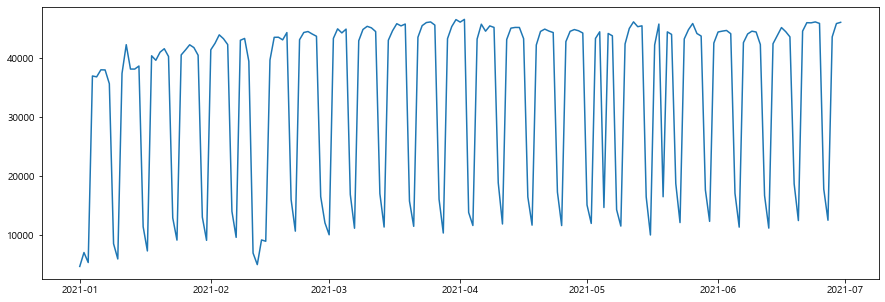

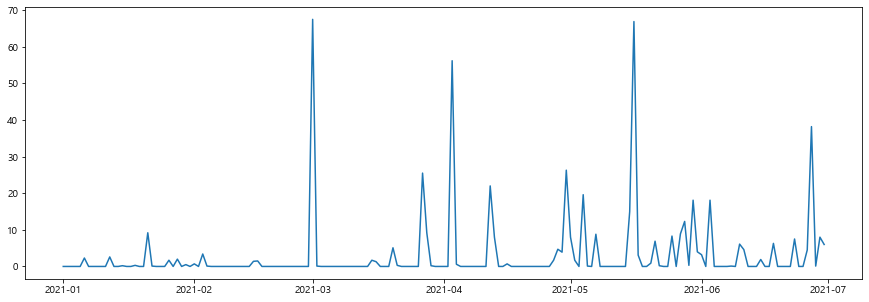

In [80]:
scLine="시청"  #input('조회할 역 이름 입력')

df3=df2[df2['역명']==scLine].groupby('날짜').sum()
df3=df3.reset_index()
df3=pd.merge(df3[['날짜','승차']], df1[['날짜', '일강수량']], on='날짜')

# 데이터 전체 출력

plt.figure(figsize=(15,5))
plt.plot(df3['날짜'], df3['승차'])
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df3['날짜'], df3['일강수량'])
plt.show()


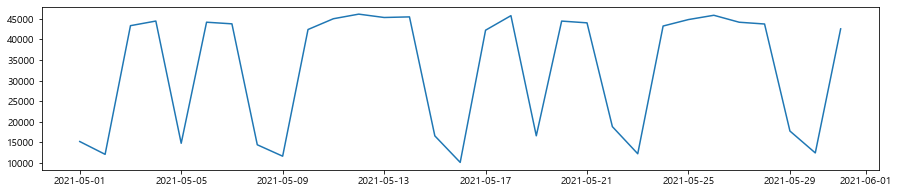

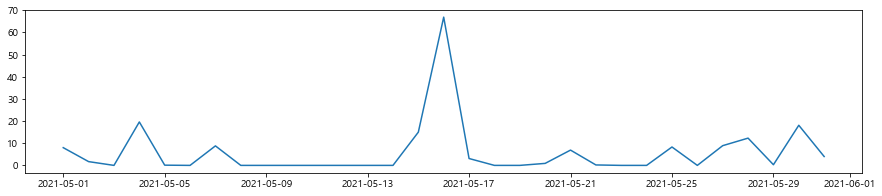

In [81]:
# 특정 기간별 출력

df3=df3[(df3['날짜']>="20210501")&(df3['날짜']<="20210531")]

plt.figure(figsize=(15,3))
plt.plot(df3['날짜'], df3['승차'])
plt.show()

plt.figure(figsize=(15,3))
plt.plot(df3['날짜'], df3['일강수량'])
plt.show()


Text(0.5, 1.0, '일일 강수량 VS 지하철 승차인원')

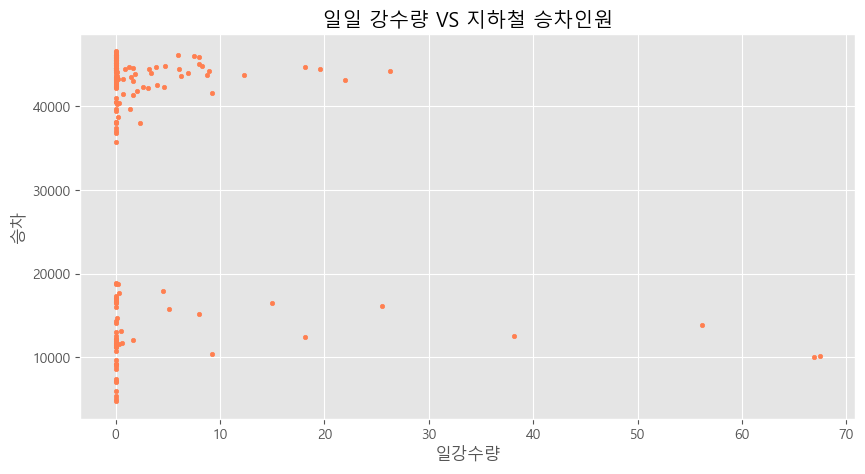

In [89]:
scLine="시청"  #input('조회할 역 이름 입력')

df3=df2[df2['역명']==scLine].groupby('날짜').sum()
df3=df3.reset_index()
df3=pd.merge(df3[['날짜','승차']], df1[['날짜', '일강수량']], on='날짜')

plt.style.use('ggplot')
df3.plot(kind = 'scatter', x = '일강수량', y = '승차', c = 'coral', s=10, figsize = (10, 5))
plt.title('일일 강수량 VS 지하철 승차인원')

In [90]:
df3

,날짜,승차,일강수량
0,2021-01-01,4750,0.0
1,2021-01-02,7108,0.0
2,2021-01-03,5416,0.0
3,2021-01-04,37006,0.0
4,2021-01-05,36857,0.0
...,...,...,...
176,2021-06-26,17871,4.5
177,2021-06-27,12574,38.2
178,2021-06-28,43627,0.1
179,2021-06-29,45882,8.0
